In [7]:

!pip install pymysql

In [2]:
#connect to database

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv



#def mysqlconnect(): 
    # To connect MySQL database 

  
connection = pymysql.connect(
    # host='192.168.208.1',
    host='192.168.11.6',
    user='root', 
    password='water',
    database='waterdata',
    port=30000)


try:
    with connection.cursor() as cursor:
               
        
        
        sql = ('''  SELECT 
                        `A`.`read_date`, 
                        `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, `A`.`mean_temp` AS `mean_temp1`,
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`, `B`.`mean_temp` AS `mean_temp2`,
                        `E`.`meter_no` AS `bl_meter3`, `E`.`bl_ahd` AS `bl_ahd3`, `E`.`mean_temp` AS `mean_temp3`,
                        `F`.`meter_no` AS `bl_meter4`, `F`.`bl_ahd` AS `bl_ahd4`, `F`.`mean_temp` AS `mean_temp4`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                        `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `groundwater` `E` ON (`E`.`meter_no` = "GW967138.1.1" AND `E`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `groundwater` `F` ON (`F`.`meter_no` = "GW967138.2.2" AND `F`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `rainfall` `D` ON (`D`.`meter_no` = "54151" AND `D`.`read_date` = `A`.`read_date` )
                    WHERE  
                        `A`.`meter_no` = "GW967137.1.1"
                    ''')
        
        
    
    df1 = pd.read_sql_query(sql, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)   # parse_dates=['read_date','%Y-%m-%d'],
    
   
except:
    print("Error: unable to convert the data")
    
connection.close()   
    


df1['bl_ahd1'] = pd.to_numeric(df1['bl_ahd1'])
df1['bl_ahd2'] = pd.to_numeric(df1['bl_ahd2'])

df1['mean_temp1'] = pd.to_numeric(df1['mean_temp1'])
df1['mean_temp2'] = pd.to_numeric(df1['mean_temp2'])

df1['bl_ahd3'] = pd.to_numeric(df1['bl_ahd3'])
df1['bl_ahd4'] = pd.to_numeric(df1['bl_ahd4'])

df1['mean_temp3'] = pd.to_numeric(df1['mean_temp3'])
df1['mean_temp4'] = pd.to_numeric(df1['mean_temp4'])

df1['sl_read1'] = pd.to_numeric(df1['sl_read1'])
df1['rf_read1'] = pd.to_numeric(df1['rf_read1'])


        
# df1.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Elfin Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')
# 
# df1.plot(x='read_date', y=['mean_temp1','mean_temp2'],figsize=(15,7), grid=True, title='Elfin Ground Water Temp over Time', xlabel='Date',ylabel='Temp')
# 
# df1.plot(x='read_date', y=['bl_ahd3','bl_ahd4'],figsize=(15,7), grid=True, title='Green Gully Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')
# 
# df1.plot(x='read_date', y=['mean_temp3','mean_temp4'],figsize=(15,7), grid=True, title='Green Gully Ground Water Temp over Time', xlabel='Date',ylabel='Temp')
# 
# df1.plot(x='read_date', y='sl_read1',figsize=(15,7), grid=True, title='Elfin Xing Water Level', xlabel='Date',ylabel='Height(m)')
# 
# df1.plot(x='read_date', y=['rf_read1'],figsize=(15,7), grid=True, title='Kaputar Rainfall', xlabel='Date',ylabel='(mm))')
# 
# plt.show()
    


all_training_data = 'training_data/all_training_data.csv'

with open(all_training_data, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile,dialect='excel')
        
        for i in range(len(df1)):
            
            fields = [df1.iloc[i,0],df1.iloc[i,1], df1.iloc[i,2],df1.iloc[i,3],df1.iloc[i,4],df1.iloc[i,5],
            df1.iloc[i,6],df1.iloc[i,7],df1.iloc[i,8],df1.iloc[i,9],df1.iloc[i,10],
            df1.iloc[i,11],df1.iloc[i,12],df1.iloc[i,13],df1.iloc[i,14],df1.iloc[i,15],df1.iloc[i,16]]
            
                    #,bl_meter1,bl_ahd1,mean_temp1,bl_meter2,bl_ahd2,mean_temp2,bl_meter3,bl_ahd3,mean_temp3,bl_meter4,bl_ahd4,mean_temp4,meter_no3,sl_read1,meter_no4,rf_read1]

            writer.writerow(map(lambda x: x, fields))

            
        
            

# Driver Code 
# if __name__ == "__main__" : 
#    mysqlconnect()
    
    
    
# Graph 1
# 
#     Elfin Blue line is bore number GW967137.1.1 which is screened so that it is measuring the alluvial aquifer
# 
#     Elfin Yellow line is bore number GW967137.2.2 which is screened so that it is measuring the deeper hardrock aquifer
# 
# Graph 2
# 
#     Green Gully Blue line is bore number GW967138.1.1 which is screened so that it is measuring the alluvial aquifer
# 
#     Green Gully Yellow line is bore number GW967138.2.2 which is screened so that it is measuring the deeper hardrock aquifer
# 
# Graph 3
# 
#     Elfin Crossing surface water gauge number 419051
# 
# Graph 4
# 
#     Kaputar Rainfall - gauge number 54151. Unfortunately its missing the data since Sept 2020 and I'm following up with the BOM.

In [20]:
#Univariate 


GW967137_1_1_training_data = 'training_data/GW967137_1_1_training_data.csv'

df2 = df1[df1['bl_meter1'] == 'GW967137.1.1']

with open(GW967137_1_1_training_data, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile,dialect='excel')
        
        for i in range(len(df1)):
            
            fields = [df2.iloc[i,0],df2.iloc[i,2]]
            
                    #,bl_meter1,bl_ahd1,mean_temp1,bl_meter2,bl_ahd2,mean_temp2,bl_meter3,bl_ahd3,mean_temp3,bl_meter4,bl_ahd4,mean_temp4,meter_no3,sl_read1,meter_no4,rf_read1]

            writer.writerow(map(lambda x: x, fields))
            

            


In [ ]:
# Univariate

GW967137_2_2_training_data = 'training_data/GW967137_2_2_training_data.csv'

df3 = df1[df1['bl_meter2'] == 'GW967137.2.2']

with open(GW967137_2_2_training_data, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile,dialect='excel')
        
        for i in range(len(df3)):
            
            fields = [df3.iloc[i,0],df3.iloc[i,2]]
            
                    #,bl_meter1,bl_ahd1,mean_temp1,bl_meter2,bl_ahd2,mean_temp2,bl_meter3,bl_ahd3,mean_temp3,bl_meter4,bl_ahd4,mean_temp4,meter_no3,sl_read1,meter_no4,rf_read1]

            writer.writerow(map(lambda x: x, fields))
            
            


In [34]:
# Multivariate

R54151_CF419051_training_data = 'training_data/54151_CF419051_training_data.csv'
            
df4 = df1[df1['bl_meter3'] == 'CF419051']

with open(R54151_CF419051_training_data, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile,dialect='excel')
        
        for i in range(len(df3)):
            
            fields = [df3.iloc[i,16], df3.iloc[i,14]]
            
                    # [0] read_date, bl_meter1, bl_ahd1, mean_temp1, bl_meter2, bl_ahd2, mean_temp2, bl_meter3, bl_ahd3, mean_temp3, bl_meter4, bl_ahd4, mean_temp4, 
                    # [13] meter_no3, sl_read1, meter_no4, rf_read1]

            writer.writerow(map(lambda x: x, fields))

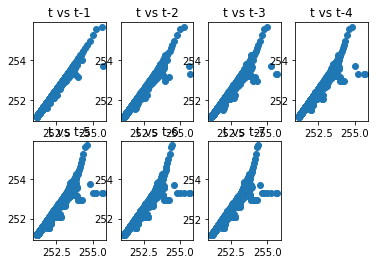

In [22]:
# create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv('training_data/GW967137_1_1_training_data.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)

values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
    
dataframe = concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    
    columns.append('t-' + str(i))

dataframe.columns = columns
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
    
plt.show()

            0
0     253.277
1     253.278
2     253.275
3     253.273
4     253.277
...       ...
5132  251.151
5133  251.148
5134  251.145
5135  251.142
5136  251.139

[5137 rows x 1 columns]


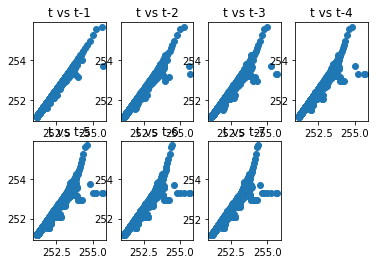

In [28]:
#create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

series = read_csv('training_data/GW967137_2_2_training_data.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)

values = DataFrame(series.values)
print(values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
    
dataframe = concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    
    columns.append('t-' + str(i))

dataframe.columns = columns
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
    
plt.show()

      sl_read1  rf_read1  rf_read1  rf_read1  rf_read1  rf_read1  rf_read1  \
0        0.295       NaN       NaN       NaN       NaN       NaN       NaN   
1        0.303      19.8       NaN       NaN       NaN       NaN       NaN   
2        0.307      21.4      19.8       NaN       NaN       NaN       NaN   
3        0.303       0.0      21.4      19.8       NaN       NaN       NaN   
4        0.304       0.0       0.0      21.4      19.8       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
5133     0.079       0.0       0.0       0.0       0.0       0.0       0.0   
5134     0.079       0.0       0.0       0.0       0.0       0.0       0.0   
5135     0.079       0.0       0.0       0.0       0.0       0.0       0.0   
5136     0.079       0.0       0.0       0.0       0.0       0.0       0.0   
5137     0.079       0.0       0.0       0.0       0.0       0.0       0.0   

      rf_read1  
0          NaN  
1          NaN  
2          N

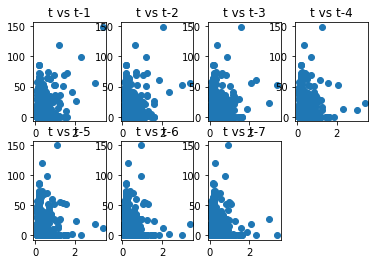

In [31]:


lags = 7
columns = [df1['sl_read1']]

for i in range(1,(lags + 1)):
    columns.append(df1['rf_read1'].shift(i))
    
dataframe = concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    
    columns.append('t-' + str(i))

print(dataframe)

dataframe.columns = columns
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
    
plt.show()